In [ ]:
import pandas as pd
file_path1=r"E:\PROGRAMMING\Predictive analysis of market trends\dataset\CPI.csv"
df_1=pd.read_csv(file_path1)
df_1

,observation_date,CPALTT01USM659N
0,1990-01-01,5.202312
1,1990-02-01,5.263158
2,1990-03-01,5.233034
3,1990-04-01,4.711617
4,1990-05-01,4.361874
...,...,...
414,2024-07-01,2.894753
415,2024-08-01,2.530730
416,2024-09-01,2.440633
417,2024-10-01,2.597905


In [155]:
df_1.columns=df_1.columns.str.strip()

df_1.columns=['Year','CPI value']

df_1

,Year,CPI value
0,1990-01-01,5.202312
1,1990-02-01,5.263158
2,1990-03-01,5.233034
3,1990-04-01,4.711617
4,1990-05-01,4.361874
...,...,...
414,2024-07-01,2.894753
415,2024-08-01,2.530730
416,2024-09-01,2.440633
417,2024-10-01,2.597905


In [ ]:
file_path2=r"E:\PROGRAMMING\Predictive analysis of market trends\dataset\GDP.csv"

df_2=pd.read_csv(file_path2)

df_2

,observation_date,GDPC1
0,1990-01-01,10047.386
1,1990-04-01,10083.855
2,1990-07-01,10090.569
3,1990-10-01,9998.704
4,1991-01-01,9951.916
...,...,...
134,2023-07-01,22780.933
135,2023-10-01,22960.600
136,2024-01-01,23053.545
137,2024-04-01,23223.906


In [ ]:
import pandas as pd

# Load the data from the CSV file
file_path2 = r"E:\PROGRAMMING\Predictive analysis of market trends\dataset\GDP.csv"
df_2 = pd.read_csv(file_path2)

# Ensure 'observation_date' is in datetime format
df_2['observation_date'] = pd.to_datetime(df_2['observation_date'])

# Set 'observation_date' as the index
df_2.set_index('observation_date', inplace=True)

# Generate a complete range of monthly dates from the start to the end date of the dataset
complete_range = pd.date_range(start=df_2.index.min(), end='2024-11-01', freq='MS')  # 'MS' means Month Start

# Reindex the DataFrame to the complete range of months
df_2 = df_2.reindex(complete_range)

# Perform linear interpolation to fill missing 'GDPC1' values
df_2['GDPC1'] = df_2['GDPC1'].interpolate(method='linear')

# Reset the index to get 'observation_date' back as a column
df_2.reset_index(inplace=True)
df_2.rename(columns={'index': 'observation_date'}, inplace=True)

df_2.columns=['Year','GDP']

# Display the DataFrame with interpolated values
print(df_2) 


          Year           GDP
0   1990-01-01  10047.386000
1   1990-02-01  10059.542333
2   1990-03-01  10071.698667
3   1990-04-01  10083.855000
4   1990-05-01  10086.093000
..         ...           ...
414 2024-07-01  23400.294000
415 2024-08-01  23400.294000
416 2024-09-01  23400.294000
417 2024-10-01  23400.294000
418 2024-11-01  23400.294000

[419 rows x 2 columns]


In [ ]:
file_path3=r"E:\PROGRAMMING\Predictive analysis of market trends\dataset\Unemployment_rate.csv"

df_3=pd.read_csv(file_path3)

df_3.columns=['Year','unemployment rate']

df_3.columns=df_3.columns.str.strip()

df_3

,Year,unemployment rate
0,1990-01-01,5.4
1,1990-02-01,5.3
2,1990-03-01,5.2
3,1990-04-01,5.4
4,1990-05-01,5.4
...,...,...
414,2024-07-01,4.3
415,2024-08-01,4.2
416,2024-09-01,4.1
417,2024-10-01,4.1


In [ ]:
file_path4=r"E:\PROGRAMMING\Predictive analysis of market trends\dataset\AAA_bondyield.csv"

df_4=pd.read_csv(file_path4)

df_4.columns=['Year','AAA bond yield']

df_4

,Year,AAA bond yield
0,1990-01-01,8.99
1,1990-02-01,9.22
2,1990-03-01,9.37
3,1990-04-01,9.46
4,1990-05-01,9.47
...,...,...
414,2024-07-01,5.12
415,2024-08-01,4.87
416,2024-09-01,4.68
417,2024-10-01,4.95


In [ ]:
file_path5=r"E:\PROGRAMMING\Predictive analysis of market trends\dataset\DGS3MO(3-mo treasury yield).csv"

df_5=pd.read_csv(file_path5)

df_5.columns=['Year','3 month treasury yield']

df_5['Year']=pd.to_datetime(df_5['Year'])

df_5.set_index('Year',inplace=True)

complete_range1=pd.date_range(start='1990-01-01',end=df_5.index.max(),freq='1D')

df_5=df_5.reindex(complete_range1)

df_5['3 month treasury yield'] = df_5['3 month treasury yield'].interpolate(method='linear')
df_5['3 month treasury yield'].fillna(method='bfill', inplace=True)
df_5.reset_index(inplace=True)
df_5.rename(columns={'index': 'Year'}, inplace=True)

final_df_5=df_5[df_5['Year'].dt.day==1]


final_df_5.reset_index(drop=True, inplace=True)

final_df_5




C:\Users\shash\AppData\Local\Temp\ipykernel_19832\3014231982.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_5['3 month treasury yield'].fillna(method='bfill', inplace=True)
C:\Users\shash\AppData\Local\Temp\ipykernel_19832\3014231982.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_5['3 month treasury yield'].fillna(method='bfill', inplace=True)


,Year,3 month treasury yield
0,1990-01-01,7.830000
1,1990-02-01,8.020000
2,1990-03-01,8.080000
3,1990-04-01,8.056667
4,1990-05-01,8.190000
...,...,...
414,2024-07-01,5.470000
415,2024-08-01,5.370000
416,2024-09-01,5.200000
417,2024-10-01,4.710000


In [ ]:
file_path6=r"E:\PROGRAMMING\Predictive analysis of market trends\dataset\DGS2(2 yr treasury yield).csv"

df_6=pd.read_csv(file_path6)

df_6.columns=['Year','2yr treasury yield']

df_6['Year']=pd.to_datetime(df_6['Year'])

df_6.set_index('Year',inplace=True)

complete_range2=pd.date_range(start='1990-01-01',end=df_6.index.max(),freq='1D')

df_6=df_6.reindex(complete_range2)

df_6['2yr treasury yield'].interpolate(method='linear')
df_6['2yr treasury yield'].fillna(method='bfill', inplace=True)
df_6.reset_index(inplace=True)
df_6.rename(columns={'index': 'Year'}, inplace=True)

final_df_6=df_6[df_6['Year'].dt.day==1]


final_df_6.reset_index(drop=True, inplace=True)

final_df_6

C:\Users\shash\AppData\Local\Temp\ipykernel_19832\796046845.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_6['2yr treasury yield'].fillna(method='bfill', inplace=True)
C:\Users\shash\AppData\Local\Temp\ipykernel_19832\796046845.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_6['2yr treasury yield'].fillna(method='bfill', inplace=True)


,Year,2yr treasury yield
0,1990-01-01,7.87
1,1990-02-01,8.28
2,1990-03-01,8.53
3,1990-04-01,8.62
4,1990-05-01,9.02
...,...,...
414,2024-07-01,4.77
415,2024-08-01,4.16
416,2024-09-01,3.88
417,2024-10-01,3.61


In [ ]:
file_path7=r"E:\PROGRAMMING\Predictive analysis of market trends\dataset\DGS10(10yr treasury yield).csv"

df_7=pd.read_csv(file_path7)

df_7.columns=['Year','10yr treasury yield']

df_7['Year']=pd.to_datetime(df_7['Year'])

df_7.set_index('Year',inplace=True)

complete_range3=pd.date_range(start='1990-01-01',end='2024-11-01',freq='1D')

df_7=df_7.reindex(complete_range3)

df_7['10yr treasury yield'].interpolate(method='linear')
df_7['10yr treasury yield'].fillna(method='bfill',inplace=True)
df_7.reset_index(inplace=True)
df_7.rename(columns={'index': 'Year'}, inplace=True)

final_df_7=df_7[df_7['Year'].dt.day==1]


final_df_7.reset_index(drop=True, inplace=True)

final_df_7



C:\Users\shash\AppData\Local\Temp\ipykernel_19832\2979796114.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_7['10yr treasury yield'].fillna(method='bfill',inplace=True)
C:\Users\shash\AppData\Local\Temp\ipykernel_19832\2979796114.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_7['10yr treasury yield'].fillna(method='bfill',inplace=True)


,Year,10yr treasury yield
0,1990-01-01,7.94
1,1990-02-01,8.42
2,1990-03-01,8.59
3,1990-04-01,8.65
4,1990-05-01,9.08
...,...,...
414,2024-07-01,4.48
415,2024-08-01,3.99
416,2024-09-01,3.84
417,2024-10-01,3.74


In [ ]:
file_path8=r"E:\PROGRAMMING\Predictive analysis of market trends\dataset\DGS30(30 yr treasury yield).csv"

df_8=pd.read_csv(file_path8)

df_8.columns=['Year','30yr treasury yield']

df_8['Year']=pd.to_datetime(df_8['Year'])

df_8.set_index('Year',inplace=True)

complete_range3=pd.date_range(start='1990-01-01',end='2024-11-01',freq='1D')

df_8=df_8.reindex(complete_range3)

df_8['30yr treasury yield'].interpolate(method='linear')
df_8['30yr treasury yield'].fillna(method='bfill',inplace=True)

df_8.reset_index(inplace=True)
df_8.rename(columns={'index': 'Year'}, inplace=True)

final_df_8=df_8[df_8['Year'].dt.day==1]


final_df_8.reset_index(drop=True, inplace=True)

final_df_8





C:\Users\shash\AppData\Local\Temp\ipykernel_19832\3359670140.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_8['30yr treasury yield'].fillna(method='bfill',inplace=True)
C:\Users\shash\AppData\Local\Temp\ipykernel_19832\3359670140.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_8['30yr treasury yield'].fillna(method='bfill',inplace=True)


,Year,30yr treasury yield
0,1990-01-01,8.00
1,1990-02-01,8.44
2,1990-03-01,8.61
3,1990-04-01,8.63
4,1990-05-01,9.04
...,...,...
414,2024-07-01,NaN
415,2024-08-01,NaN
416,2024-09-01,NaN
417,2024-10-01,NaN


In [ ]:
file_path9=r"E:\PROGRAMMING\Predictive analysis of market trends\dataset\Exchange_rate_usd-eu.csv"

df_9=pd.read_csv(file_path9)

df_9.columns=['Year','Exchange rate usd to euro']

df_9

,Year,Exchange rate usd to euro
0,1990-01-01,0.831900
1,1990-02-01,0.820800
2,1990-03-01,0.835100
3,1990-04-01,0.825100
4,1990-05-01,0.811400
...,...,...
414,2024-07-01,0.922077
415,2024-08-01,0.907303
416,2024-09-01,0.900525
417,2024-10-01,0.917739


In [ ]:
file_path10=r"E:\PROGRAMMING\Predictive analysis of market trends\dataset\Exchange_rate_usd-ru.csv"

df_10=pd.read_csv(file_path10)

df_10.columns=['Year','Exchange rate usd to rus']

df_10['Year']=pd.to_datetime(df_10['Year'])

df_10.set_index('Year',inplace=True)

complete_range4=pd.date_range(start='1990-01-01',end='2024-11-01',freq='MS')

df_10=df_10.reindex(complete_range4)

df_10.reset_index(inplace=True)
df_10.rename(columns={'index': 'Year'}, inplace=True)

final_df_10=df_10[df_10['Year'].dt.day==1]


final_df_10.reset_index(drop=True, inplace=True)


final_df_10



,Year,Exchange rate usd to rus
0,1990-01-01,NaN
1,1990-02-01,NaN
2,1990-03-01,NaN
3,1990-04-01,NaN
4,1990-05-01,NaN
...,...,...
414,2024-07-01,NaN
415,2024-08-01,NaN
416,2024-09-01,NaN
417,2024-10-01,NaN


In [ ]:
file_path11=r"E:\PROGRAMMING\Predictive analysis of market trends\dataset\Exchange_rate_usd-inr.csv"

df_11=pd.read_csv(file_path11)

df_11.columns=['Year','Exchange rate USD to INR']

df_11['Year']=pd.to_datetime(df_11['Year'])

df_11.set_index('Year',inplace=True)

complete_range5=pd.date_range(start='1990-01-01',end='2024-11-01',freq='MS')

df_11=df_11.reindex(complete_range5)

df_11.reset_index(inplace=True)
df_11.rename(columns={'index': 'Year'}, inplace=True)

final_df_11=df_11[df_11['Year'].dt.day==1]


final_df_11.reset_index(drop=True, inplace=True)






final_df_11

,Year,Exchange rate USD to INR
0,1990-01-01,16.965000
1,1990-02-01,17.002000
2,1990-03-01,17.120000
3,1990-04-01,17.280000
4,1990-05-01,17.320000
...,...,...
414,2024-07-01,83.594655
415,2024-08-01,83.896290
416,2024-09-01,83.808215
417,2024-10-01,84.024410


In [ ]:
file_path12=r"E:\PROGRAMMING\Predictive analysis of market trends\dataset\1yr_treasury_yield.csv"
df_12=pd.read_csv(file_path12)
df_12.columns=['Year','1yr treasury yield']
df_12

,Year,1yr treasury yield
0,1990-01-01,7.38
1,1990-02-01,7.55
2,1990-03-01,7.76
3,1990-04-01,7.80
4,1990-05-01,7.73
...,...,...
414,2024-07-01,4.68
415,2024-08-01,4.25
416,2024-09-01,3.87
417,2024-10-01,4.03


In [ ]:
file_path13=r"E:\PROGRAMMING\Predictive analysis of market trends\dataset\BBB_bondyield.csv"

df_13=pd.read_csv(file_path13)

df_13.columns=['Year','BBB bond yield']

df_13['Year']=pd.to_datetime(df_13['Year'])

df_13.set_index('Year',inplace=True)

complete_range6=pd.date_range(start='1990-01-01',end='2024-11-01',freq='1D')

df_13=df_13.reindex(complete_range6)



df_13.reset_index(inplace=True)
df_13.rename(columns={'index': 'Year'}, inplace=True)

#final_df_13=df_13[df_13['Year'].dt.day==1]


#final_df_13.reset_index(drop=True, inplace=True)

#final_df_13.head(50)
df_13


,Year,BBB bond yield
0,1990-01-01,NaN
1,1990-01-02,NaN
2,1990-01-03,NaN
3,1990-01-04,NaN
4,1990-01-05,NaN
...,...,...
12719,2024-10-28,5.34
12720,2024-10-29,5.33
12721,2024-10-30,5.34
12722,2024-10-31,5.38


In [169]:
from functools import reduce
dataframes = [df_1,df_2,df_3,df_4,final_df_5, final_df_6, final_df_7,final_df_8,df_9,final_df_10,final_df_11,df_12,df_13]  # Replace with your actual 13 DataFrames
# Print the columns of each dataframe to check for 'Year'
for df in dataframes:
    print(df.columns)


# Convert the 'Year' column to datetime in all DataFrames
for df in dataframes:
    df['Year'] = pd.to_datetime(df['Year'], errors='coerce')  # Convert to datetime

# Check the types of 'Year' to ensure consistency
for i, df in enumerate(dataframes, 1):
    print(f"DataFrame {i} 'Year' type: {df['Year'].dtype}")


# Merge all DataFrames on the 'Year' column
merged_df = reduce(lambda left, right: pd.merge(left, right, on='Year', how='inner'), dataframes)

# Display the merged DataFrame
merged_df

Index(['Year', 'CPI value'], dtype='object')
Index(['Year', 'GDP'], dtype='object')
Index(['Year', 'unemployment rate'], dtype='object')
Index(['Year', 'AAA bond yield'], dtype='object')
Index(['Year', '3 month treasury yield'], dtype='object')
Index(['Year', '2yr treasury yield'], dtype='object')
Index(['Year', '10yr treasury yield'], dtype='object')
Index(['Year', '30yr treasury yield'], dtype='object')
Index(['Year', 'Exchange rate usd to euro'], dtype='object')
Index(['Year', 'Exchange rate usd to rus'], dtype='object')
Index(['Year', 'Exchange rate USD to INR'], dtype='object')
Index(['Year', '1yr treasury yield'], dtype='object')
Index(['Year', 'BBB bond yield'], dtype='object')
DataFrame 1 'Year' type: datetime64[ns]
DataFrame 2 'Year' type: datetime64[ns]
DataFrame 3 'Year' type: datetime64[ns]
DataFrame 4 'Year' type: datetime64[ns]
DataFrame 5 'Year' type: datetime64[ns]
DataFrame 6 'Year' type: datetime64[ns]
DataFrame 7 'Year' type: datetime64[ns]
DataFrame 8 'Year' type: d

C:\Users\shash\AppData\Local\Temp\ipykernel_19832\1430793152.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Year'], errors='coerce')  # Convert to datetime
C:\Users\shash\AppData\Local\Temp\ipykernel_19832\1430793152.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Year'], errors='coerce')  # Convert to datetime
C:\Users\shash\AppData\Local\Temp\ipykernel_19832\1430793152.py:10: SettingWithCopyWarning: 
A value is trying to be set on 

,Year,CPI value,GDP,unemployment rate,AAA bond yield,3 month treasury yield,2yr treasury yield,10yr treasury yield,30yr treasury yield,Exchange rate usd to euro,Exchange rate usd to rus,Exchange rate USD to INR,1yr treasury yield,BBB bond yield
0,1990-01-01,5.202312,10047.386000,5.4,8.99,7.830000,7.87,7.94,8.00,0.831900,NaN,16.965000,7.38,NaN
1,1990-02-01,5.263158,10059.542333,5.3,9.22,8.020000,8.28,8.42,8.44,0.820800,NaN,17.002000,7.55,NaN
2,1990-03-01,5.233034,10071.698667,5.2,9.37,8.080000,8.53,8.59,8.61,0.835100,NaN,17.120000,7.76,NaN
3,1990-04-01,4.711617,10083.855000,5.4,9.46,8.056667,8.62,8.65,8.63,0.825100,NaN,17.280000,7.80,NaN
4,1990-05-01,4.361874,10086.093000,5.4,9.47,8.190000,9.02,9.08,9.04,0.811400,NaN,17.320000,7.73,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,2024-07-01,2.894753,23400.294000,4.3,5.12,5.470000,4.77,4.48,NaN,0.922077,NaN,83.594655,4.68,5.78
415,2024-08-01,2.530730,23400.294000,4.2,4.87,5.370000,4.16,3.99,NaN,0.907303,NaN,83.896290,4.25,5.32
416,2024-09-01,2.440633,23400.294000,4.1,4.68,5.200000,3.88,3.84,NaN,0.900525,NaN,83.808215,3.87,NaN
417,2024-10-01,2.597905,23400.294000,4.1,4.95,4.710000,3.61,3.74,NaN,0.917739,NaN,84.024410,4.03,4.92


In [170]:
merged_df.head(10)

,Year,CPI value,GDP,unemployment rate,AAA bond yield,3 month treasury yield,2yr treasury yield,10yr treasury yield,30yr treasury yield,Exchange rate usd to euro,Exchange rate usd to rus,Exchange rate USD to INR,1yr treasury yield,BBB bond yield
0,1990-01-01,5.202312,10047.386000,5.4,8.99,7.830000,7.87,7.94,8.00,0.8319,NaN,16.965,7.38,NaN
1,1990-02-01,5.263158,10059.542333,5.3,9.22,8.020000,8.28,8.42,8.44,0.8208,NaN,17.002,7.55,NaN
2,1990-03-01,5.233034,10071.698667,5.2,9.37,8.080000,8.53,8.59,8.61,0.8351,NaN,17.120,7.76,NaN
3,1990-04-01,4.711617,10083.855000,5.4,9.46,8.056667,8.62,8.65,8.63,0.8251,NaN,17.280,7.80,NaN
4,1990-05-01,4.361874,10086.093000,5.4,9.47,8.190000,9.02,9.08,9.04,0.8114,NaN,17.320,7.73,NaN
5,1990-06-01,4.673650,10088.331000,5.2,9.26,7.940000,8.33,8.44,8.43,0.8177,NaN,17.431,7.53,NaN
6,1990-07-01,4.823151,10090.569000,5.5,9.24,8.000000,8.25,8.43,8.41,0.7927,NaN,17.416,7.40,NaN
7,1990-08-01,5.617978,10059.947333,5.7,9.41,7.670000,7.85,8.29,8.36,0.7599,NaN,17.377,7.26,NaN
8,1990-09-01,6.160000,10029.325667,5.9,9.56,7.632500,8.09,8.90,9.03,0.7617,NaN,17.869,7.24,NaN
9,1990-10-01,6.289809,9998.704000,5.9,9.53,7.370000,7.94,8.71,8.84,0.7398,NaN,18.051,7.06,NaN


In [171]:
# Ensure the 'Year' column is in datetime format
merged_df['Year'] = pd.to_datetime(merged_df['Year'], errors='coerce')

# Filter the DataFrame to include rows from 1 January 1992 onwards
filtered_df = merged_df[merged_df['Year'] >= '1992-06-01']

# Reset index if necessary
filtered_df.reset_index(drop=True, inplace=True)

# Display the filtered DataFrame
print(filtered_df)

          Year  CPI value           GDP  unemployment rate  AAA bond yield  \
0   1992-06-01   3.088235  10415.591667                7.8            8.22   
1   1992-07-01   3.157122  10449.673000                7.7            8.07   
2   1992-08-01   3.147877  10485.998000                7.6            7.95   
3   1992-09-01   2.988338  10522.323000                7.6            7.92   
4   1992-10-01   3.202329  10558.648000                7.3            7.99   
..         ...        ...           ...                ...             ...   
385 2024-07-01   2.894753  23400.294000                4.3            5.12   
386 2024-08-01   2.530730  23400.294000                4.2            4.87   
387 2024-09-01   2.440633  23400.294000                4.1            4.68   
388 2024-10-01   2.597905  23400.294000                4.1            4.95   
389 2024-11-01   2.749380  23400.294000                4.2            5.14   

     3 month treasury yield  2yr treasury yield  10yr treasury 

In [172]:
filtered_df['Year'] = pd.to_datetime(filtered_df['Year'], errors='coerce')

# Set 'Year' as the index (required for resampling)
filtered_df.set_index('Year', inplace=True)

# Resample the data to daily frequency
daily_df = filtered_df.resample('D').asfreq()

# Interpolate missing values for daily data
daily_df = daily_df.interpolate(method='linear')

# Reset index if needed
daily_df.reset_index(inplace=True)

# Display the daily DataFrame
daily_df

C:\Users\shash\AppData\Local\Temp\ipykernel_19832\2443710538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = pd.to_datetime(filtered_df['Year'], errors='coerce')


,Year,CPI value,GDP,unemployment rate,AAA bond yield,3 month treasury yield,2yr treasury yield,10yr treasury yield,30yr treasury yield,Exchange rate usd to euro,Exchange rate usd to rus,Exchange rate USD to INR,1yr treasury yield,BBB bond yield
0,1992-06-01,3.088235,10415.591667,7.800000,8.220000,3.820000,5.290000,7.390000,7.900000,0.767900,0.1380,25.89000,3.980000,NaN
1,1992-06-02,3.090531,10416.727711,7.796667,8.215000,3.813667,5.274333,7.380333,7.895333,0.766630,0.1390,25.89000,3.962333,NaN
2,1992-06-03,3.092827,10417.863756,7.793333,8.210000,3.807333,5.258667,7.370667,7.890667,0.765360,0.1400,25.89000,3.944667,NaN
3,1992-06-04,3.095124,10418.999800,7.790000,8.205000,3.801000,5.243000,7.361000,7.886000,0.764090,0.1410,25.89000,3.927000,NaN
4,1992-06-05,3.097420,10420.135844,7.786667,8.200000,3.794667,5.227333,7.351333,7.881333,0.762820,0.1420,25.89000,3.909333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11837,2024-10-28,2.729835,23400.294000,4.187097,5.115484,4.622903,4.132581,4.288710,4.400000,0.938138,88.0459,84.02441,4.125806,5.381613
11838,2024-10-29,2.734721,23400.294000,4.190323,5.121613,4.619677,4.151935,4.309032,4.400000,0.938893,88.0459,84.02441,4.129355,5.398710
11839,2024-10-30,2.739607,23400.294000,4.193548,5.127742,4.616452,4.171290,4.329355,4.400000,0.939649,88.0459,84.02441,4.132903,5.415806
11840,2024-10-31,2.744494,23400.294000,4.196774,5.133871,4.613226,4.190645,4.349677,4.400000,0.940404,88.0459,84.02441,4.136452,5.432903


In [173]:
daily_df.describe()

,Year,CPI value,GDP,unemployment rate,AAA bond yield,3 month treasury yield,2yr treasury yield,10yr treasury yield,30yr treasury yield,Exchange rate usd to euro,Exchange rate usd to rus,Exchange rate USD to INR,1yr treasury yield,BBB bond yield
count,11842,11842.000000,11842.000000,11842.000000,11842.000000,11842.000000,11842.000000,11842.000000,11842.000000,11842.000000,11842.000000,11842.000000,11842.000000,10077.000000
mean,2008-08-16 12:00:00,2.565663,16619.812320,5.663363,5.363232,2.491077,2.933963,3.956407,4.496064,0.853245,36.757661,52.529997,2.419867,5.252189
min,1992-06-01 00:00:00,-2.097161,10415.591667,3.400000,2.140000,0.000000,0.110000,0.560000,1.230000,0.634609,0.138000,25.890000,0.050000,2.150000
25%,2000-07-09 06:00:00,1.682139,14152.803798,4.356667,3.983578,0.160798,0.833112,2.470000,3.071290,0.770533,24.969345,42.772050,0.440161,3.854516
50%,2008-08-16 12:00:00,2.482632,16664.358959,5.288548,5.322540,1.972968,2.645484,3.936720,4.480000,0.847380,30.140532,46.961265,2.043382,5.169508
75%,2016-09-23 18:00:00,3.147067,19267.450371,6.419839,6.757583,4.861796,4.743871,5.327984,5.679024,0.912729,59.786189,65.520773,4.471935,6.530328
max,2024-11-01 00:00:00,9.059758,23400.294000,14.800000,8.680000,6.370000,7.730000,7.920000,8.060000,1.171642,103.680800,84.024410,6.670000,9.850000
std,NaN,1.565369,3497.203438,1.771705,1.578308,2.142030,2.113443,1.733861,1.593338,0.107295,24.927220,15.442760,1.943466,1.656424


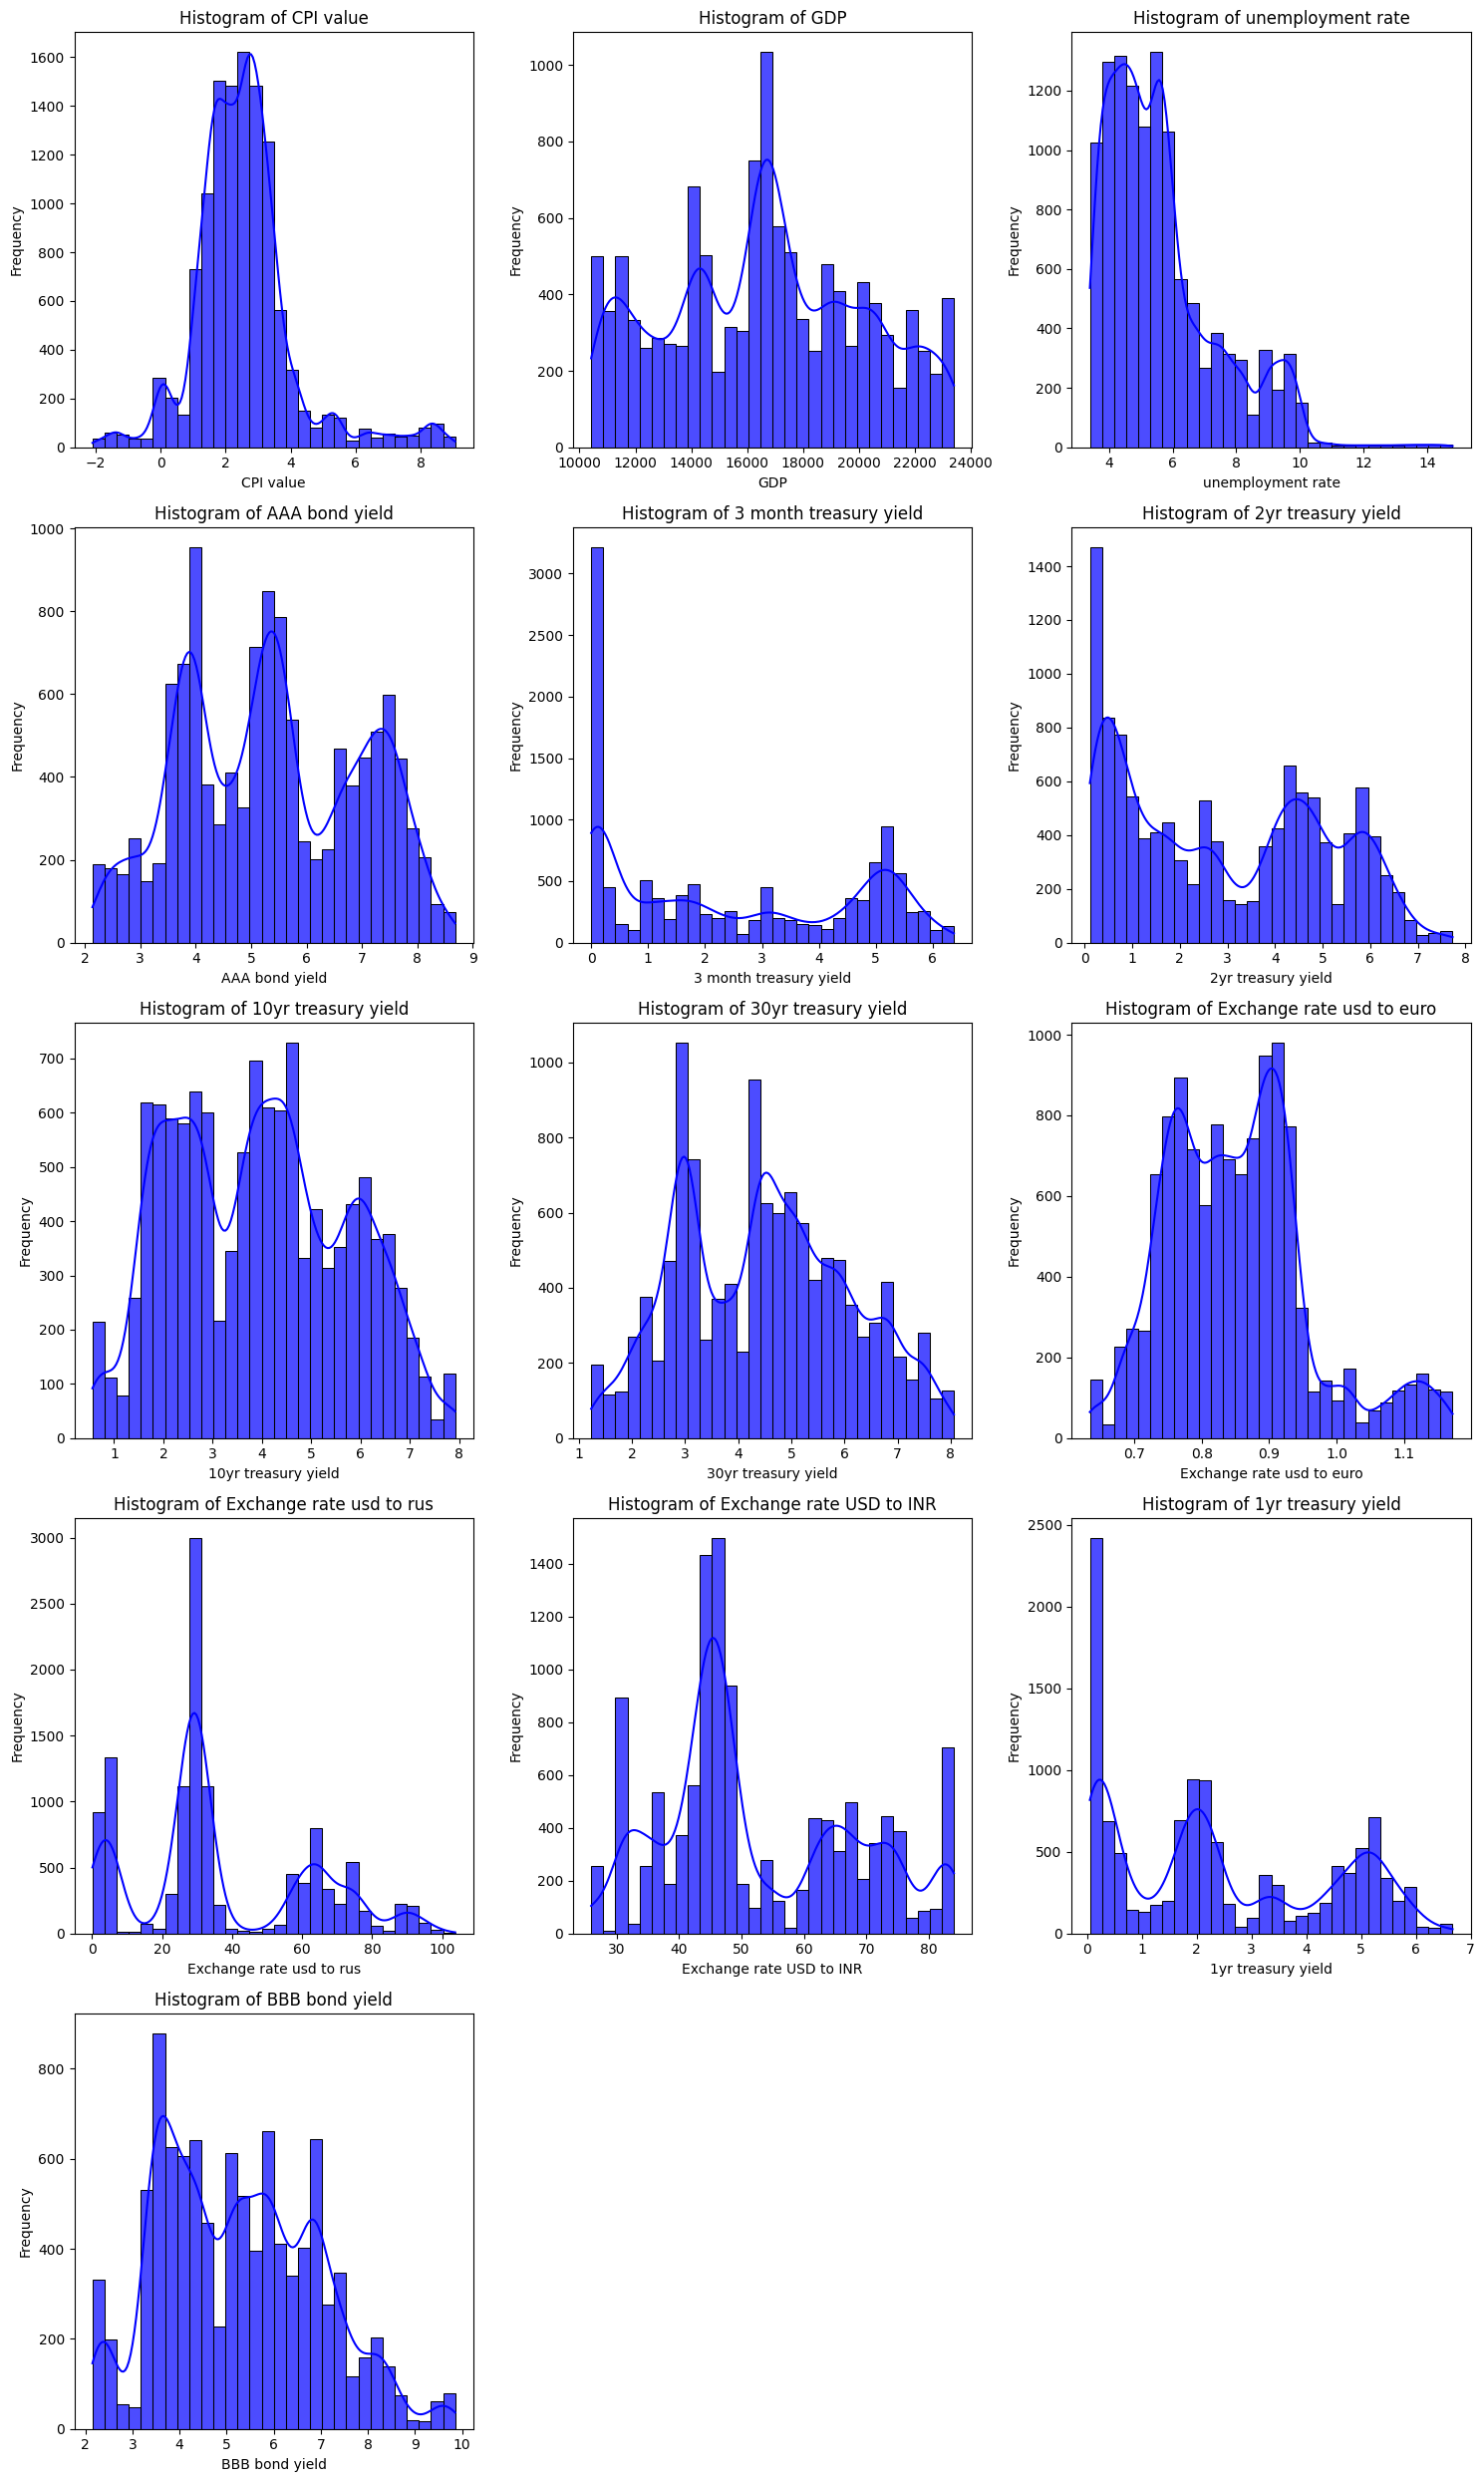

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert "Year" to datetime if it exists and is not already in datetime format
if 'Year' in daily_df.columns:
    daily_df['Year'] = pd.to_datetime(daily_df['Year'], errors='coerce')

# Drop "Year" column to focus on numeric data, if it exists
if 'Year' in daily_df.columns:
    numeric_df = daily_df.drop(columns=['Year'])
else:
    numeric_df = daily_df

# Get numeric columns
numeric_columns = numeric_df.select_dtypes(include=['number']).columns

# Create subplots to display histograms side by side
n_cols = 3  # Number of columns for subplots
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Calculate required rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()  # Flatten axes for easy iteration

for i, column in enumerate(numeric_columns):
    sns.histplot(data=numeric_df, x=column, kde=True, bins=30, color="blue", alpha=0.7, ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()
